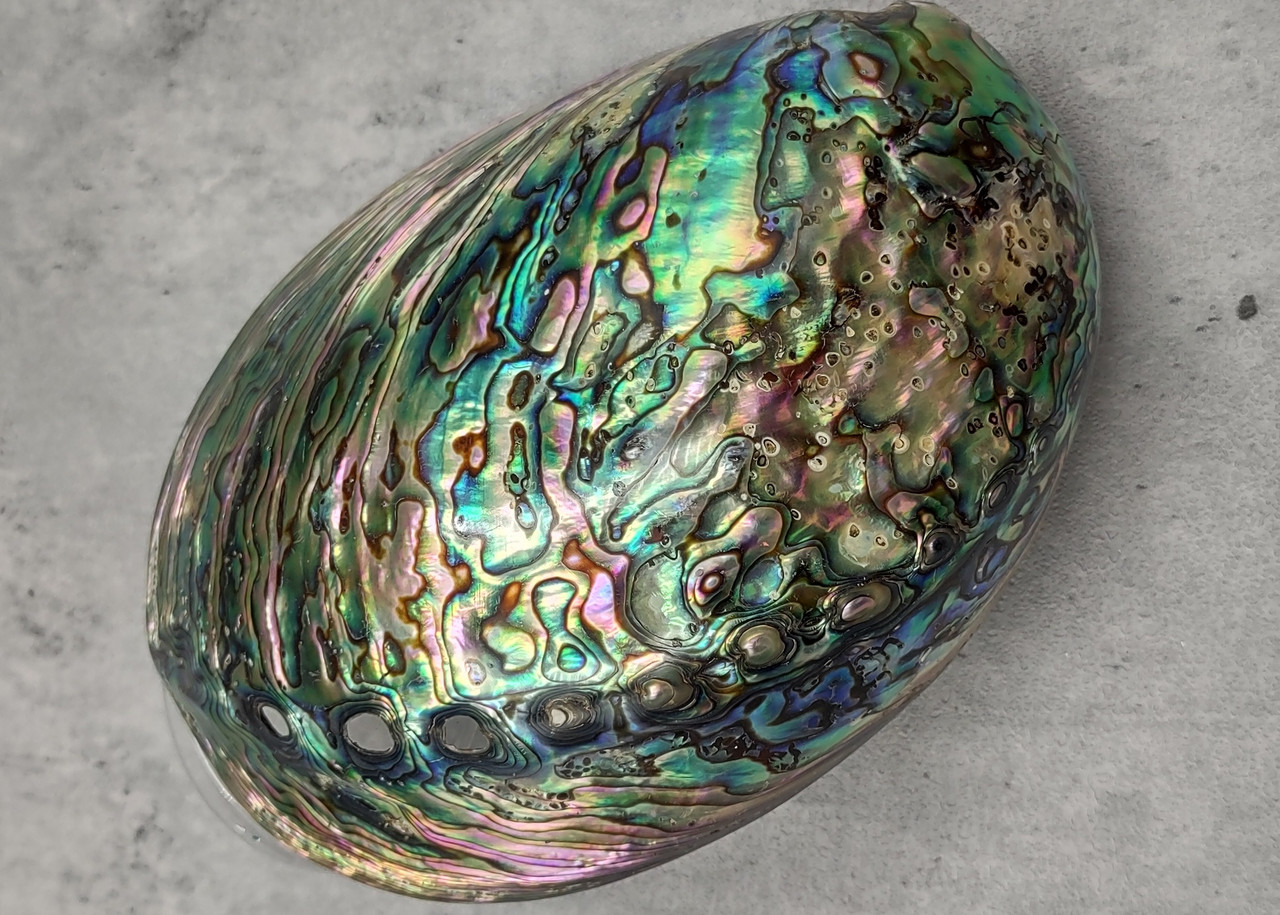

In [10]:
from IPython.display import Image
Image("abalone.jpg", width=200, height=100)

In [11]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import statsmodels.api as sm
from scipy.stats import median_abs_deviation as mad

abalone = pd.read_csv("data/abalone.csv")

df = abalone

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 1. prepare for classification


In [12]:
from scipy import stats
from sklearn.calibration import LabelEncoder


data_copy = abalone.copy()

numerical_cols = data_copy.select_dtypes(include=[np.number]).columns
data_copy[numerical_cols] = data_copy[numerical_cols].apply(np.log1p)

z_scores = np.abs(stats.zscore(data_copy[numerical_cols]))
data_copy = data_copy[(z_scores < 3).all(axis=1)]

categorical_cols = data_copy.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data_copy[col] = le.fit_transform(data_copy[col])

## 2.Define variable

In [13]:
# Rings nigga

## 3.Train and test

In [14]:
abalone["Sex"] = abalone["Sex"].astype('category')
abalone["Sex"] = abalone["Sex"].cat.codes
abalone["Sex"]

X = abalone.drop('Rings', axis=1)
y = abalone['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import pandas as pd

# Assuming 'df' is your DataFrame and 'class_label' is the column with class labels
class_counts = abalone['Sex'].value_counts()
num_classes = len(class_counts)

print(f"Number of classes: {num_classes}")
print(class_counts)

print("Mean of X_train_scaled: ", np.mean(X_train_scaled))
print("Standard deviation of X_train_scaled: ", np.std(X_train_scaled))


Number of classes: 3
2    1528
1    1342
0    1307
Name: Sex, dtype: int64
Mean of X_train_scaled:  1.3664283380001927e-16
Standard deviation of X_train_scaled:  1.0


## 4.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model.fit(X_train_scaled, y_train) 
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         3
           4       0.45      0.69      0.55        13
           5       0.50      0.28      0.36        32
           6       0.33      0.27      0.30        48
           7       0.36      0.37      0.36        84
           8       0.30      0.45      0.36        99
           9       0.28      0.39      0.33       142
          10       0.24      0.29      0.27       139
          11       0.24      0.26      0.25        93
          12       0.00      0.00      0.00        51
          13       0.03      0.03      0.03        31
          14       1.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       1.00      0.00      0.00         7
   

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

c:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Cross-Validation Scores: [0.28096948 0.27289048 0.27044025]
Mean CV Score: 0.2747667385552281


## 5.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Evaluate model (e.g., with classification_report)
y_pred_lda = lda_model.predict(X_test_scaled)
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda,zero_division=1))



LDA Classification Report:
               precision    recall  f1-score   support

           3       0.50      0.67      0.57         3
           4       0.36      0.69      0.47        13
           5       0.36      0.31      0.33        32
           6       0.36      0.31      0.33        48
           7       0.38      0.33      0.36        84
           8       0.30      0.39      0.34        99
           9       0.29      0.44      0.35       142
          10       0.26      0.24      0.25       139
          11       0.27      0.26      0.26        93
          12       0.00      0.00      0.00        51
          13       0.10      0.13      0.11        31
          14       1.00      0.00      0.00        26
          15       0.10      0.05      0.06        21
          16       0.25      0.31      0.28        13
          17       0.14      0.12      0.13         8
          18       0.00      0.00      0.00        12
          19       1.00      0.00      0.00         7

## 6.

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)

y_pred_qda = qda_model.predict(X_test_scaled)
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda,zero_division=1))


ValueError: y has only 1 sample in class 1, covariance is ill defined.

## 7.

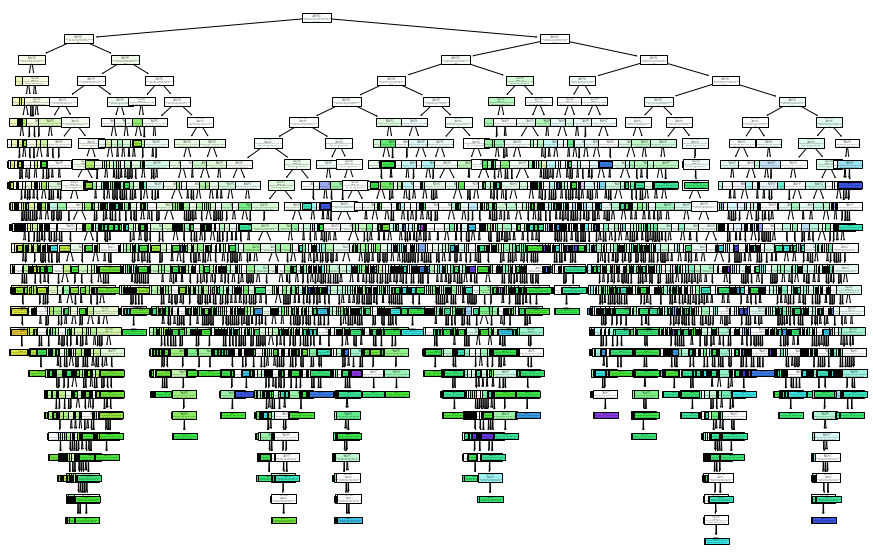

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


model.fit(X_train_scaled, y_train)

yp_model = model.predict(X_test)


plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.show()


## 8.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Evaluate model (e.g., with classification_report)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf,zero_division=1))


Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.14      0.33      0.20         3
           4       0.25      0.31      0.28        13
           5       0.48      0.41      0.44        32
           6       0.29      0.23      0.26        48
           7       0.35      0.32      0.34        84
           8       0.28      0.42      0.34        99
           9       0.24      0.27      0.25       142
          10       0.22      0.23      0.22       139
          11       0.25      0.30      0.27        93
          12       0.17      0.14      0.15        51
          13       0.08      0.06      0.07        31
          14       0.20      0.08      0.11        26
          15       0.00      0.00      0.00        21
          16       0.17      0.08      0.11        13
          17       0.25      0.12      0.17         8
          18       1.00      0.00      0.00        12
          19       1.00      0.00      0.00

## 9.

In [ ]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.28195151152349596
Test Accuracy: 0.27392344497607657


## 10.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have already loaded and split your data (X_train_scaled, y_train, X_test_scaled, y_test)

# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Assuming you have a list of feature names (replace with your actual feature names)
feature_names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']

# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
print("Feature Importance:\n", sorted_feature_importance)


Feature Importance:
 [('Sex_F', 0.15944136471463471), ('Viscera weight', 0.15434611684580338), ('Shucked weight', 0.1502202430025601), ('Shell weight', 0.14937873994452996), ('Height', 0.11947998486120792), ('Diameter', 0.11778009422722249), ('Whole weight', 0.1080713643338066), ('Length', 0.041282092070234734)]
